# TALL Parameter Sweep Analysis

This notebook analyzes the TALL parameter sweep results from the post-training optimization pipeline. It includes:

1. Loading CSV data with parameter sweep results
2. Creating pivot tables for analysis
3. Visualizing results with heatmaps and plots
4. Analyzing parameter sensitivity

The CSV file contains results for different combinations of `flip_p` and `num_iter` parameters, along with their corresponding accuracies.

## 1. Import Required Libraries

Import all necessary libraries for data analysis and visualization.

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set up plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
sns.set_style("whitegrid")

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load and Examine CSV Data

Load the TALL parameter sweep results from the CSV file and examine the data structure.

In [65]:
# Load the CSV file
csv_file = 'hardware_export_fixed/tall_parameter_sweep_cmax128.csv'

# Extract c_max value from filename
import re
c_max_match = re.search(r'cmax(\d+)', csv_file)
c_max = int(c_max_match.group(1)) if c_max_match else 'Unknown'

try:
    df = pd.read_csv(csv_file)
    print(f"Successfully loaded {csv_file}")
    print(f"Extracted C_MAX value: {c_max}")
    print(f"Data shape: {df.shape}")
    print("\nColumns in the dataset:")
    print(df.columns.tolist())
    
    print("\nFirst few rows:")
    print(df.head())
    
    print("\nData types:")
    print(df.dtypes)
    
    # Check if we have the enhanced format with additional metrics
    if 'baseline_accuracy' in df.columns:
        print("\n✓ Enhanced CSV format detected with additional accuracy metrics!")
        print(f"Baseline accuracy: {df['baseline_accuracy'].iloc[0]:.4f}%")
        print(f"Clamped accuracy (C_MAX={c_max}): {df['clamped_accuracy'].iloc[0]:.4f}%")
        print(f"Best TALL accuracy: {df['accuracy'].max():.4f}%")
        print(f"Max improvement from clamped: {df['clamped_to_tall_improvement'].max():.4f}%")
        print(f"Max improvement from baseline: {df['baseline_to_tall_improvement'].max():.4f}%")
    else:
        print("\n⚠️ Basic CSV format detected (no additional accuracy metrics)")
    
    print("\nBasic statistics:")
    print(df.describe())
    
except FileNotFoundError:
    print(f"File {csv_file} not found. Please check the file path.")
    print("Available files in the directory:")
    import os
    for file in os.listdir('hardware_export_fixed/'):
        if file.endswith('.csv'):
            print(f"  - {file}")

Successfully loaded hardware_export_fixed/tall_parameter_sweep_cmax128.csv
Extracted C_MAX value: 128
Data shape: (81, 9)

Columns in the dataset:
['flip_p', 'num_iter', 'accuracy', 'baseline_accuracy', 'clamped_accuracy', 'tall_accuracy', 'clamped_to_tall_improvement', 'baseline_to_tall_improvement', 'is_best']

First few rows:
   flip_p  num_iter  accuracy  baseline_accuracy  clamped_accuracy  \
0    0.05         5     97.34              97.38             97.34   
1    0.05        30     97.34              97.38             97.34   
2    0.15        40     97.33              97.38             97.34   
3    0.20       200     97.33              97.38             97.34   
4    0.15       100     97.32              97.38             97.34   

   tall_accuracy  clamped_to_tall_improvement  baseline_to_tall_improvement  \
0          97.34                         0.00                         -0.04   
1          97.34                         0.00                         -0.04   
2          

## 3. Create Pivot Table

Create a pivot table with `flip_p` as rows and `num_iter` as columns, showing accuracy values.

In [66]:
# Create pivot table
pivot_table = df.pivot(index='flip_p', columns='num_iter', values='accuracy')

print(f"Pivot Table (flip_p vs num_iter) - C_MAX={c_max}:")
print(pivot_table)

# Find the best parameters
best_row = df.loc[df['accuracy'].idxmax()]
print(f"\nBest parameters (C_MAX={c_max}):")
print(f"flip_p: {best_row['flip_p']}")
print(f"num_iter: {best_row['num_iter']}")
print(f"accuracy: {best_row['accuracy']:.4f}%")

# Show parameter ranges
print(f"\nParameter ranges:")
print(f"flip_p: {df['flip_p'].unique()}")
print(f"num_iter: {df['num_iter'].unique()}")

Pivot Table (flip_p vs num_iter) - C_MAX=128:
num_iter    1      5      10     20     30     40     50     100    200
flip_p                                                                 
0.05      97.12  97.34  97.26  97.28  97.34  97.29  97.30  97.27  97.30
0.10      96.64  97.24  97.13  97.23  97.26  97.26  97.29  97.27  97.31
0.15      96.25  97.01  97.12  97.24  97.21  97.33  97.31  97.32  97.29
0.20      94.81  96.92  97.19  97.08  97.20  97.27  97.29  97.26  97.33
0.25      91.50  96.70  97.03  97.16  97.14  97.22  97.22  97.20  97.31
0.30      83.49  96.10  96.92  97.02  97.19  97.14  97.21  97.31  97.27
0.35      67.07  94.70  96.28  96.94  97.11  97.03  97.04  97.15  97.23
0.40      45.92  85.87  93.97  96.21  96.61  96.89  96.86  96.94  97.19
0.45      24.32  49.98  69.24  85.22  91.38  93.73  94.80  96.43  97.07

Best parameters (C_MAX=128):
flip_p: 0.05
num_iter: 5
accuracy: 97.3400%

Parameter ranges:
flip_p: [0.05 0.15 0.2  0.1  0.25 0.3  0.35 0.4  0.45]
num_iter: [  5

## 4. Visualization - Heatmap

Create a heatmap to visualize the accuracy across different parameter combinations.

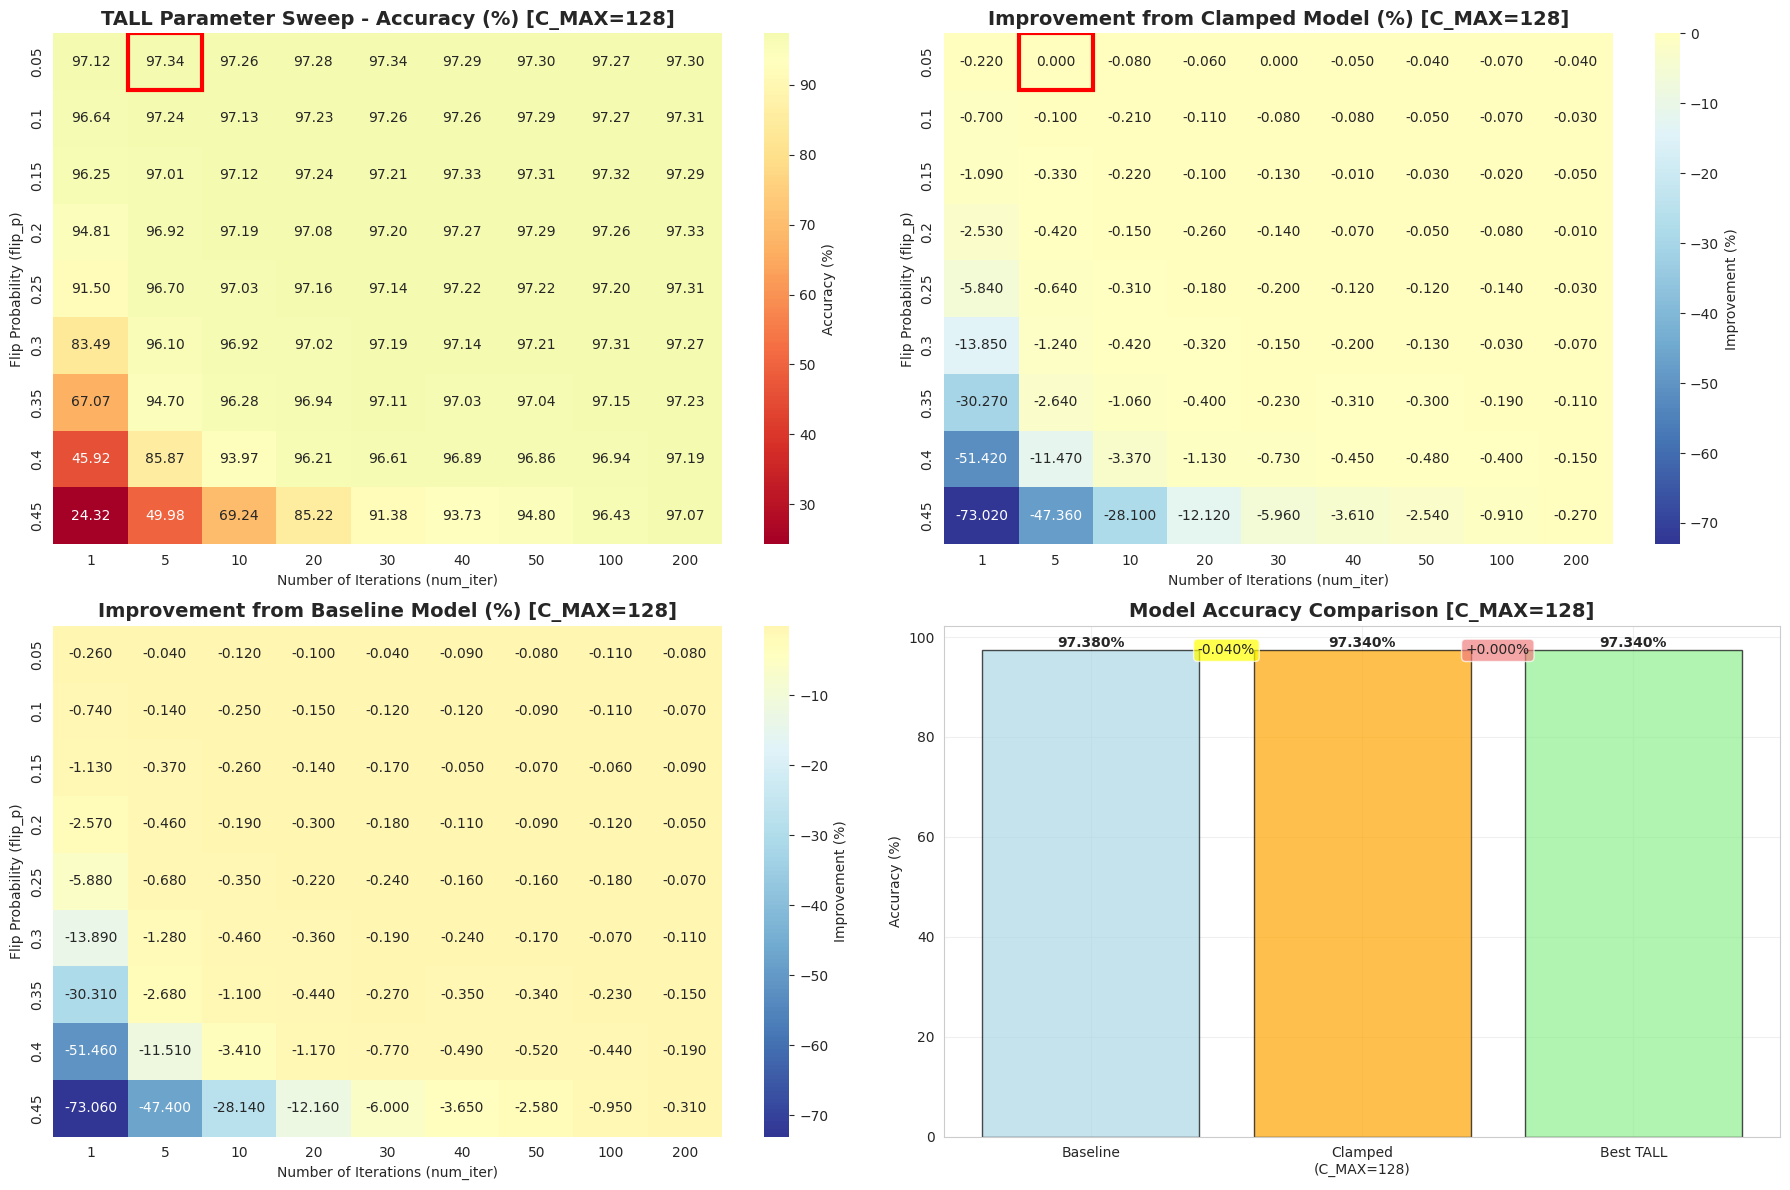

Best result highlighted with red border: flip_p=0.05, num_iter=5 (C_MAX=128)
Best improvement from clamped (C_MAX=128): 0.0000%
Best improvement from baseline: -0.0400%


In [67]:
# Create heatmap for accuracy
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
axes = axes.flatten()

# Main accuracy heatmap
sns.heatmap(pivot_table, 
            annot=True, 
            fmt='.2f', 
            cmap='RdYlGn', 
            center=pivot_table.mean().mean(),
            cbar_kws={'label': 'Accuracy (%)'},
            ax=axes[0])

axes[0].set_title(f'TALL Parameter Sweep - Accuracy (%) [C_MAX={c_max}]', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Iterations (num_iter)')
axes[0].set_ylabel('Flip Probability (flip_p)')

# Highlight the best result
best_flip_p = best_row['flip_p']
best_num_iter = best_row['num_iter']
flip_p_idx = list(pivot_table.index).index(best_flip_p)
num_iter_idx = list(pivot_table.columns).index(best_num_iter)
rect = plt.Rectangle((num_iter_idx, flip_p_idx), 1, 1, fill=False, edgecolor='red', lw=3)
axes[0].add_patch(rect)

# If enhanced format is available, create additional heatmaps
if 'clamped_to_tall_improvement' in df.columns:
    # Improvement from clamped heatmap
    improvement_pivot = df.pivot(index='flip_p', columns='num_iter', values='clamped_to_tall_improvement')
    sns.heatmap(improvement_pivot, 
                annot=True, 
                fmt='.3f', 
                cmap='RdYlBu_r', 
                center=0,
                cbar_kws={'label': 'Improvement (%)'},
                ax=axes[1])
    axes[1].set_title(f'Improvement from Clamped Model (%) [C_MAX={c_max}]', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Number of Iterations (num_iter)')
    axes[1].set_ylabel('Flip Probability (flip_p)')
    
    # Highlight the best result in improvement from clamped heatmap
    flip_p_idx = list(improvement_pivot.index).index(best_flip_p)
    num_iter_idx = list(improvement_pivot.columns).index(best_num_iter)
    rect = plt.Rectangle((num_iter_idx, flip_p_idx), 1, 1, fill=False, edgecolor='red', lw=3)
    axes[1].add_patch(rect)
    
    # Improvement from baseline heatmap
    baseline_improvement_pivot = df.pivot(index='flip_p', columns='num_iter', values='baseline_to_tall_improvement')
    sns.heatmap(baseline_improvement_pivot, 
                annot=True, 
                fmt='.3f', 
                cmap='RdYlBu_r', 
                center=baseline_improvement_pivot.mean().mean(),
                cbar_kws={'label': 'Improvement (%)'},
                ax=axes[2])
    axes[2].set_title(f'Improvement from Baseline Model (%) [C_MAX={c_max}]', fontsize=14, fontweight='bold')
    axes[2].set_xlabel('Number of Iterations (num_iter)')
    axes[2].set_ylabel('Flip Probability (flip_p)')
    
    # Accuracy comparison bar chart
    baseline_acc = df['baseline_accuracy'].iloc[0]
    clamped_acc = df['clamped_accuracy'].iloc[0]
    best_tall_acc = df['accuracy'].max()
    
    accuracies = [baseline_acc, clamped_acc, best_tall_acc]
    labels = ['Baseline', f'Clamped\n(C_MAX={c_max})', 'Best TALL']
    colors = ['lightblue', 'orange', 'lightgreen']
    
    bars = axes[3].bar(labels, accuracies, color=colors, alpha=0.7, edgecolor='black')
    axes[3].set_ylabel('Accuracy (%)')
    axes[3].set_title(f'Model Accuracy Comparison [C_MAX={c_max}]', fontsize=14, fontweight='bold')
    axes[3].grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, acc in zip(bars, accuracies):
        axes[3].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                    f'{acc:.3f}%', ha='center', va='bottom', fontweight='bold')
    
    # Add improvement annotations
    baseline_to_clamped_diff = clamped_acc - baseline_acc
    clamped_to_tall_diff = best_tall_acc - clamped_acc
    
    # Format the baseline to clamped improvement
    if baseline_to_clamped_diff >= 0:
        baseline_to_clamped_text = f'+{baseline_to_clamped_diff:.3f}%'
    else:
        baseline_to_clamped_text = f'{baseline_to_clamped_diff:.3f}%'
    
    # Format the clamped to TALL improvement
    if clamped_to_tall_diff >= 0:
        clamped_to_tall_text = f'+{clamped_to_tall_diff:.3f}%'
    else:
        clamped_to_tall_text = f'{clamped_to_tall_diff:.3f}%'
    
    axes[3].annotate(baseline_to_clamped_text, 
                    xy=(0.5, (baseline_acc + clamped_acc)/2), 
                    xytext=(0.5, (baseline_acc + clamped_acc)/2),
                    ha='center', va='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.7))
    
    axes[3].annotate(clamped_to_tall_text, 
                    xy=(1.5, (clamped_acc + best_tall_acc)/2), 
                    xytext=(1.5, (clamped_acc + best_tall_acc)/2),
                    ha='center', va='center',
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightcoral', alpha=0.7))
else:
    # If basic format, just show parameter ranges
    axes[1].text(0.5, 0.5, 'Enhanced metrics not available\nin this CSV format', 
                ha='center', va='center', transform=axes[1].transAxes, fontsize=12)
    axes[1].set_title(f'Additional Analysis Requires Enhanced CSV Format [C_MAX={c_max}]')
    axes[2].axis('off')
    axes[3].axis('off')

plt.tight_layout()
plt.show()

print(f"Best result highlighted with red border: flip_p={best_flip_p}, num_iter={best_num_iter} (C_MAX={c_max})")
if 'clamped_to_tall_improvement' in df.columns:
    print(f"Best improvement from clamped (C_MAX={c_max}): {df['clamped_to_tall_improvement'].max():.4f}%")
    print(f"Best improvement from baseline: {df['baseline_to_tall_improvement'].max():.4f}%")

## 5. Parameter Sensitivity Analysis

Analyze how each parameter affects the accuracy for the current C_MAX setting.

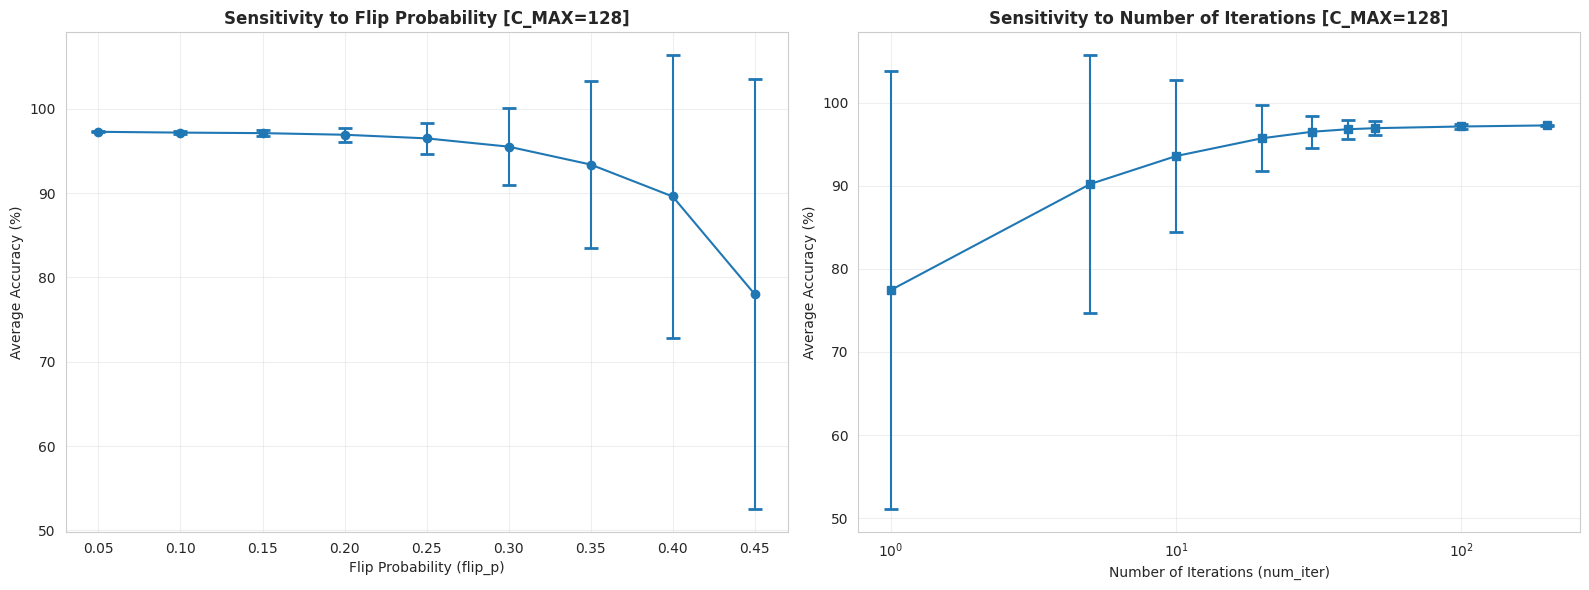

Flip Probability Sensitivity (C_MAX=128):
   flip_p     mean      std
0    0.05  97.2778   0.0653
1    0.10  97.1811   0.2092
2    0.15  97.1200   0.3429
3    0.20  96.9278   0.8040
4    0.25  96.4978   1.8825
5    0.30  95.5167   4.5250
6    0.35  93.3944   9.9040
7    0.40  89.6067  16.7747
8    0.45  78.0189  25.5136

Number of Iterations Sensitivity (C_MAX=128):
   num_iter     mean      std
0         1  77.4578  26.3831
1         5  90.2067  15.5152
2        10  93.5711   9.1832
3        20  95.7089   3.9468
4        30  96.4933   1.9288
5        40  96.7956   1.1582
6        50  96.9244   0.8106
7       100  97.1278   0.2863
8       200  97.2556   0.0823


In [68]:
# Parameter sensitivity analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Sensitivity to flip_p (average across all num_iter values)
flip_p_sensitivity = df.groupby('flip_p')['accuracy'].agg(['mean', 'std']).reset_index()

ax1.errorbar(flip_p_sensitivity['flip_p'], flip_p_sensitivity['mean'], 
             yerr=flip_p_sensitivity['std'], marker='o', capsize=5, capthick=2)
ax1.set_xlabel('Flip Probability (flip_p)')
ax1.set_ylabel('Average Accuracy (%)')
ax1.set_title(f'Sensitivity to Flip Probability [C_MAX={c_max}]', fontsize=12, fontweight='bold')
ax1.grid(True, alpha=0.3)

# Sensitivity to num_iter (average across all flip_p values)
num_iter_sensitivity = df.groupby('num_iter')['accuracy'].agg(['mean', 'std']).reset_index()

ax2.errorbar(num_iter_sensitivity['num_iter'], num_iter_sensitivity['mean'], 
             yerr=num_iter_sensitivity['std'], marker='s', capsize=5, capthick=2)
ax2.set_xlabel('Number of Iterations (num_iter)')
ax2.set_ylabel('Average Accuracy (%)')
ax2.set_title(f'Sensitivity to Number of Iterations [C_MAX={c_max}]', fontsize=12, fontweight='bold')
ax2.set_xscale('log')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print sensitivity statistics
print(f"Flip Probability Sensitivity (C_MAX={c_max}):")
print(flip_p_sensitivity.round(4))
print(f"\nNumber of Iterations Sensitivity (C_MAX={c_max}):")
print(num_iter_sensitivity.round(4))

## 6. Additional Analysis

Perform additional analysis including accuracy distribution and optimal parameter recommendations for the current C_MAX setting.

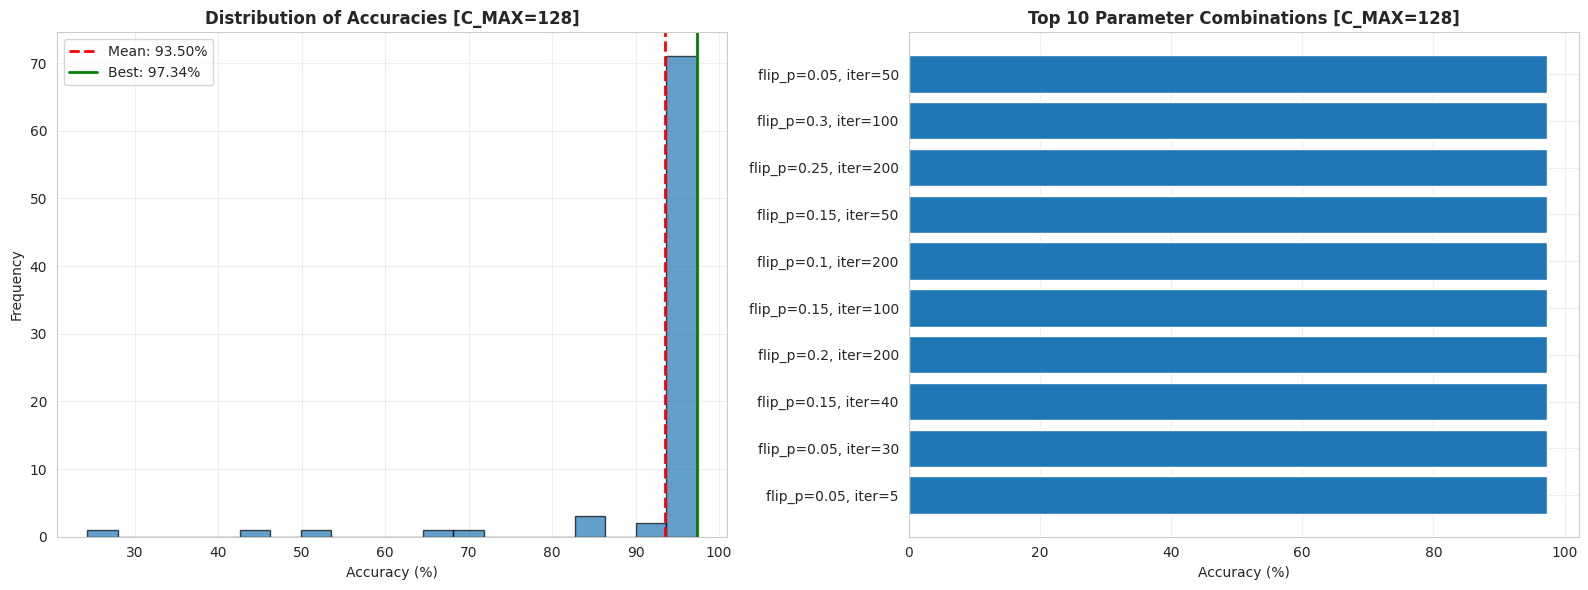

Summary Statistics (C_MAX=128):
Best accuracy: 97.3400%
Worst accuracy: 24.3200%
Mean accuracy: 93.5046%
Standard deviation: 11.8991%
Range: 73.0200%

=== RECOMMENDATIONS FOR C_MAX=128 ===
1. Best single configuration: flip_p=0.05, num_iter=5 (97.3400%)

2. Near-optimal configurations (within 0.1% of best):
   flip_p=0.05, num_iter=5 (97.3400%)
   flip_p=0.05, num_iter=30 (97.3400%)
   flip_p=0.15, num_iter=40 (97.3300%)
   flip_p=0.2, num_iter=200 (97.3300%)
   flip_p=0.15, num_iter=100 (97.3200%)
   flip_p=0.1, num_iter=200 (97.3100%)
   flip_p=0.15, num_iter=50 (97.3100%)
   flip_p=0.25, num_iter=200 (97.3100%)
   flip_p=0.3, num_iter=100 (97.3100%)
   flip_p=0.05, num_iter=50 (97.3000%)
   flip_p=0.05, num_iter=200 (97.3000%)
   flip_p=0.05, num_iter=40 (97.2900%)
   flip_p=0.1, num_iter=50 (97.2900%)
   flip_p=0.15, num_iter=200 (97.2900%)
   flip_p=0.2, num_iter=50 (97.2900%)
   flip_p=0.05, num_iter=20 (97.2800%)
   flip_p=0.05, num_iter=100 (97.2700%)
   flip_p=0.1, num_iter=10

In [69]:
# Accuracy distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Histogram of accuracies
ax1.hist(df['accuracy'], bins=20, alpha=0.7, edgecolor='black')
ax1.axvline(df['accuracy'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["accuracy"].mean():.2f}%')
ax1.axvline(best_row['accuracy'], color='green', linestyle='-', linewidth=2, label=f'Best: {best_row["accuracy"]:.2f}%')
ax1.set_xlabel('Accuracy (%)')
ax1.set_ylabel('Frequency')
ax1.set_title(f'Distribution of Accuracies [C_MAX={c_max}]', fontsize=12, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Top 10 parameter combinations
top_10 = df.nlargest(10, 'accuracy')
ax2.barh(range(len(top_10)), top_10['accuracy'])
ax2.set_yticks(range(len(top_10)))
ax2.set_yticklabels([f'flip_p={row.flip_p}, iter={row.num_iter}' for _, row in top_10.iterrows()])
ax2.set_xlabel('Accuracy (%)')
ax2.set_title(f'Top 10 Parameter Combinations [C_MAX={c_max}]', fontsize=12, fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print(f"Summary Statistics (C_MAX={c_max}):")
print(f"Best accuracy: {df['accuracy'].max():.4f}%")
print(f"Worst accuracy: {df['accuracy'].min():.4f}%")
print(f"Mean accuracy: {df['accuracy'].mean():.4f}%")
print(f"Standard deviation: {df['accuracy'].std():.4f}%")
print(f"Range: {df['accuracy'].max() - df['accuracy'].min():.4f}%")

# Recommendations
print(f"\n=== RECOMMENDATIONS FOR C_MAX={c_max} ===")
print(f"1. Best single configuration: flip_p={best_row['flip_p']}, num_iter={best_row['num_iter']} ({best_row['accuracy']:.4f}%)")

# Find configurations within 0.1% of best
near_optimal = df[df['accuracy'] >= (best_row['accuracy'] - 0.1)]
print(f"\n2. Near-optimal configurations (within 0.1% of best):")
for _, row in near_optimal.iterrows():
    print(f"   flip_p={row['flip_p']}, num_iter={row['num_iter']} ({row['accuracy']:.4f}%)")

# Most robust flip_p (highest minimum accuracy)
flip_p_robustness = df.groupby('flip_p')['accuracy'].min().sort_values(ascending=False)
print(f"\n3. Most robust flip_p (highest worst-case): {flip_p_robustness.index[0]} (min accuracy: {flip_p_robustness.iloc[0]:.4f}%)")

## 7. Export Analysis Results

Save the analysis results and pivot table to CSV files for future reference, including C_MAX information in filenames.

In [70]:
# Create output directory if it doesn't exist
import os
os.makedirs('hardware_export_fixed/', exist_ok=True)

# Save pivot table to CSV with c_max in filename
pivot_table.to_csv(f'hardware_export_fixed/tall_analysis_pivot_table_cmax{c_max}.csv')
print(f"Pivot table saved to: hardware_export_fixed/tall_analysis_pivot_table_cmax{c_max}.csv")

# Save sensitivity analysis with c_max in filename
flip_p_sensitivity.to_csv(f'hardware_export_fixed/flip_p_sensitivity_cmax{c_max}.csv', index=False)
num_iter_sensitivity.to_csv(f'hardware_export_fixed/num_iter_sensitivity_cmax{c_max}.csv', index=False)
print(f"Sensitivity analysis saved to CSV files with C_MAX={c_max} suffix")

# Save top results with c_max in filename
top_10.to_csv(f'hardware_export_fixed/top_10_configurations_cmax{c_max}.csv', index=False)
print(f"Top 10 configurations saved to: hardware_export_fixed/top_10_configurations_cmax{c_max}.csv")

# Create enhanced summary report
if 'baseline_accuracy' in df.columns:
    baseline_acc = df['baseline_accuracy'].iloc[0]
    clamped_acc = df['clamped_accuracy'].iloc[0]
    best_tall_acc = df['accuracy'].max()
    max_clamped_improvement = df['clamped_to_tall_improvement'].max()
    max_baseline_improvement = df['baseline_to_tall_improvement'].max()
    
    summary_data = {
        'Metric': ['C_MAX_Value', 'Baseline Accuracy', 'Clamped Accuracy', 'Best TALL Accuracy', 
                   'Best Accuracy Overall', 'Worst Accuracy', 'Mean Accuracy', 'Std Deviation', 'Range', 
                   'Max Improvement from Clamped', 'Max Improvement from Baseline',
                   'Best flip_p', 'Best num_iter'],
        'Value': [c_max, f"{baseline_acc:.4f}%", f"{clamped_acc:.4f}%", f"{best_tall_acc:.4f}%",
                  f"{df['accuracy'].max():.4f}%", f"{df['accuracy'].min():.4f}%", f"{df['accuracy'].mean():.4f}%", 
                  f"{df['accuracy'].std():.4f}%", f"{df['accuracy'].max() - df['accuracy'].min():.4f}%",
                  f"{max_clamped_improvement:.4f}%", f"{max_baseline_improvement:.4f}%",
                  best_row['flip_p'], best_row['num_iter']]
    }
    
    # Save detailed accuracy comparison with c_max info
    accuracy_comparison = pd.DataFrame({
        'C_MAX': [c_max, c_max, c_max],
        'Model_Type': ['Baseline', 'Clamped', 'Best_TALL'],
        'Accuracy': [baseline_acc, clamped_acc, best_tall_acc],
        'Improvement_from_Baseline': [0, clamped_acc - baseline_acc, best_tall_acc - baseline_acc],
        'Improvement_from_Previous': [0, clamped_acc - baseline_acc, best_tall_acc - clamped_acc]
    })
    accuracy_comparison.to_csv(f'hardware_export_fixed/accuracy_comparison_cmax{c_max}.csv', index=False)
    print(f"Accuracy comparison saved to: hardware_export_fixed/accuracy_comparison_cmax{c_max}.csv")
    
else:
    summary_data = {
        'Metric': ['C_MAX_Value', 'Best Accuracy', 'Worst Accuracy', 'Mean Accuracy', 'Std Deviation', 'Range', 'Best flip_p', 'Best num_iter'],
        'Value': [c_max, f"{df['accuracy'].max():.4f}%", f"{df['accuracy'].min():.4f}%", f"{df['accuracy'].mean():.4f}%", 
                  f"{df['accuracy'].std():.4f}%", f"{df['accuracy'].max() - df['accuracy'].min():.4f}%", 
                  best_row['flip_p'], best_row['num_iter']]
    }

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv(f'hardware_export_fixed/tall_analysis_summary_cmax{c_max}.csv', index=False)
print(f"Summary report saved to: hardware_export_fixed/tall_analysis_summary_cmax{c_max}.csv")

# If enhanced format, also save improvement pivot tables with c_max in filename
if 'clamped_to_tall_improvement' in df.columns:
    improvement_pivot = df.pivot(index='flip_p', columns='num_iter', values='clamped_to_tall_improvement')
    baseline_improvement_pivot = df.pivot(index='flip_p', columns='num_iter', values='baseline_to_tall_improvement')
    
    improvement_pivot.to_csv(f'hardware_export_fixed/clamped_to_tall_improvement_pivot_cmax{c_max}.csv')
    baseline_improvement_pivot.to_csv(f'hardware_export_fixed/baseline_to_tall_improvement_pivot_cmax{c_max}.csv')
    print(f"Improvement pivot tables saved to CSV files with C_MAX={c_max} suffix")

print(f"\nAll analysis results exported successfully for C_MAX={c_max}!")
print("\nGenerated files:")
for file in sorted(os.listdir('hardware_export_fixed/')):
    if f'cmax{c_max}' in file or (file.startswith('tall_') and 'cmax' not in file):
        print(f"  - {file}")

Pivot table saved to: hardware_export_fixed/tall_analysis_pivot_table_cmax128.csv
Sensitivity analysis saved to CSV files with C_MAX=128 suffix
Top 10 configurations saved to: hardware_export_fixed/top_10_configurations_cmax128.csv
Accuracy comparison saved to: hardware_export_fixed/accuracy_comparison_cmax128.csv
Summary report saved to: hardware_export_fixed/tall_analysis_summary_cmax128.csv
Improvement pivot tables saved to CSV files with C_MAX=128 suffix

All analysis results exported successfully for C_MAX=128!

Generated files:
  - accuracy_comparison_cmax128.csv
  - baseline_to_tall_improvement_pivot_cmax128.csv
  - clamped_to_tall_improvement_pivot_cmax128.csv
  - flip_p_sensitivity_cmax128.csv
  - num_iter_sensitivity_cmax128.csv
  - tall_analysis_pivot_table.csv
  - tall_analysis_pivot_table_cmax128.csv
  - tall_analysis_summary.csv
  - tall_analysis_summary_cmax128.csv
  - tall_parameter_sweep.csv
  - tall_parameter_sweep_cmax128.csv
  - top_10_configurations_cmax128.csv
